### Open Notebook in Colab
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shubhamshah207/AirFlight-Price-Prediction/blob/main/Modeling.ipynb)

In [ ]:
import pandas as pd

In [48]:
df = pd.read_csv('./data/final_2020.csv')
# df = pd.read_csv('./data/random100000.csv')

In [49]:
df['AIRLINE_COMPANY'].value_counts()[0]

1828375

***We are only considering the airlines which are having sufficient data so filtering the dataframe***

In [50]:
airline_vals = ['WN','AA','DL','UA','AS','B6','NK','G4']
airlines = ['WN','AA','DL','UA','AS','B6','NK','G4']

In [51]:
df = df[df['AIRLINE_COMPANY'].isin(airlines)]

In [52]:
df.columns

Index(['ITIN_ID', 'MARKET_COUPONS', 'QUARTER', 'ORIGIN', 'ORIGIN_WAC', 'DEST',
       'DEST_WAC', 'AIRPORT_GROUP', 'WAC_GROUP', 'DISTANCE_GROUP', 'MILES',
       'CONTINUE_USA', 'NUM_OF_TICKETS', 'AIRLINE_COMPANY',
       'PRICE_PER_TICKET'],
      dtype='object')

***Splitting the data into two parts one for training and one for testing.***

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
features = ['MARKET_COUPONS', 'QUARTER', 'ORIGIN', 'DEST', 'MILES', 'NUM_OF_TICKETS', 'AIRLINE_COMPANY']
X = df[features]
Y = df['PRICE_PER_TICKET']

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=99)

In [55]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import OrdinalEncoder

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.fit_transform(X_test)
model = linear_model.LinearRegression()
model.fit(X_train_encoded, Y_train)


LinearRegression()

***As Mean squared error is very high in Liner regression, we will not be considering that model.***

In [56]:
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(max_depth=20, n_estimators=20)
)

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ORIGIN', 'DEST', 'AIRLINE_COMPANY'],
                                mapping=[{'col': 'ORIGIN',
                                          'data_type': dtype('O'),
                                          'mapping': ECP      1
MKE      2
MDW      3
MSP      4
IAH      5
      ... 
LAR    294
PIR    295
RKS    296
ATY    297
NaN     -2
Length: 298, dtype: int64},
                                         {'col': 'DEST',
                                          'data_type': dtype('O'),
                                          'mapping': SAT      1
BNA      2
ATL      3
SNA      4
SFO      5
      ... 
ATY    296
PRC    297
CMX    298
CMI    299
NaN     -2
Length: 300, dtype: int64},
                                         {'col': 'AIRLINE_COMPANY',
                                          'data_type': dtype('O'),
                                          'mapping': WN     1
DL     2
UA     3
AS     4
AA     5
NK

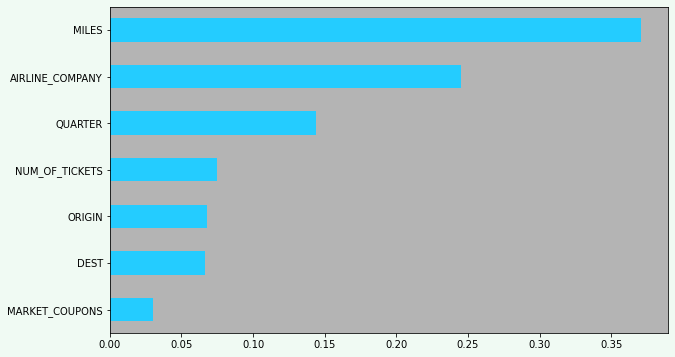

In [57]:
model = pipeline.named_steps['randomforestregressor']
importances = pd.Series(model.feature_importances_, list(X.columns))

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6), facecolor = '#f0faf3')
ax.set(facecolor='#b4b4b4')
#plt.title('Feature Importances for 2018 Flights Data (Target: PricePerTicket)')
n=12
importances.sort_values()[-n:].plot.barh(color='#24ccff');

In [58]:
import pickle
filename = './model/finalized_model_small.sav'
pickle.dump(model, open(filename, 'wb'))

In [59]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_encoded, Y_test)

In [60]:
result

0.2805790145558964

In [61]:
from sklearn.metrics import r2_score
y_pred = pipeline.predict(X_test_encoded)
print('RandomForest R^2 Score = ', r2_score(Y_test, y_pred))

RandomForest R^2 Score =  0.038328176745044296


***As you can see r square score is less for random forest we will be finalizing that model***

In [62]:
importances.sort_values()[-n:]

MARKET_COUPONS     0.030261
DEST               0.066745
ORIGIN             0.068155
NUM_OF_TICKETS     0.074972
QUARTER            0.143761
AIRLINE_COMPANY    0.245202
MILES              0.370903
dtype: float64

In [63]:
importances = importances.sort_values()[-n:].index

In [64]:
pipeline_encoder = pipeline.named_steps['ordinalencoder']
mapping = pipeline_encoder.mapping

origin_dict = dict(mapping[0])
dest_dict = mapping[1]
airline_dict = mapping[2]

In [65]:
airline_dict["mapping"].to_csv("./LookupFiles/airline_dict.csv")

In [66]:
dest_dict["mapping"].to_csv("./LookupFiles/dest_dict.csv")

In [67]:
origin_dict["mapping"].to_csv("./LookupFiles/origin_dict.csv")

In [68]:
origin_dict = pd.read_csv("./LookupFiles/origin_dict.csv").set_index('Unnamed: 0')
dest_dict = pd.read_csv("./LookupFiles/dest_dict.csv").set_index('Unnamed: 0')
airline_dict = pd.read_csv("./LookupFiles/airline_dict.csv").set_index('Unnamed: 0')

In [69]:
origin_dict.loc['ECP', '0']

1

In [70]:
import os
download_path = os.path.expanduser('~/data')
print(download_path)


C:\Users\Shubham Shah/data
